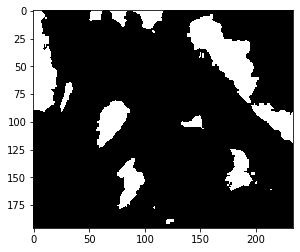

In [1]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

im1 = Image.open('image5.png')
a = np.array(im1)
se = np.array([[1,1,1],[1,1,1],[1,1,1]])
plt.imshow(a, cmap='gray', vmin=0, vmax=255)

In [2]:
def erosion(ar,se):
    e = True
    for x in range(se.shape[0]):
        for y in range(se.shape[1]):
            if se[x,y] == 1 and ar[x,y] == 0:
                e = False
    return e

In [3]:
def dilation(ar,se):
    e = False
    for x in range(se.shape[0]):
        for y in range(se.shape[1]):
            if se[x,y] == 1 and ar[x,y] > 0:
                e = True
    return e

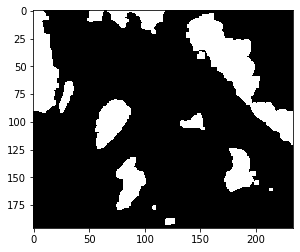

In [4]:
c = np.zeros((a.shape[0]+2,a.shape[1]+2))
d = np.zeros(a.shape)
c[1:-1,1:-1] = a
for x in range(1,c.shape[0]-1):
    for y in range(1,c.shape[1]-1):
        if erosion(c[x-1:x+2,y-1:y+2],se) :
            d[x-1,y-1] = 255
        else:
            d[x-1,y-1] = 0
c = np.zeros((a.shape[0]+2,a.shape[1]+2))
o = np.zeros(a.shape)
c[1:-1,1:-1] = a
for x in range(1,c.shape[0]-1):
    for y in range(1,c.shape[1]-1):
        if dilation(c[x-1:x+2,y-1:y+2],se) :
            o[x-1,y-1] = 255
        else:
            o[x-1,y-1] = 0
o = o.astype(np.uint8)
plt.imshow(o, cmap='gray', vmin=0, vmax=255)
im2 = Image.fromarray(o)
im2.save('image5_open.png')